# QPF Results

First, read and plot the regression results.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
stdids = ['466880', '466910', '466920', '466930', '466940', 
          'C0A520', 'C0A530', 'C0A540', 'C0A550', 'C0A560', 
          'C0A570', 'C0A580', 'C0A640', 'C0A650', 'C0A660', 
          'C0A710', 'C0A860', 'C0A870', 'C0A880', 'C0A890', 
          'C0A920', 'C0A940', 'C0A950', 'C0A970', 'C0A980', 
          'C0A9A0', 'C0A9B0', 'C0A9C0', 'C0A9E0', 'C0A9F0', 
          'C0A9G0', 'C0A9I1', 'C0AC40', 'C0AC60', 'C0AC70', 
          'C0AC80', 'C0ACA0', 'C0AD00', 'C0AD10', 'C0AD20', 
          'C0AD30', 'C0AD40', 'C0AD50', 'C0AG90', 'C0AH00']

xpath = '../data/qpesums_encoded'
ypath = '../examples/data/t1hr.csv'

# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
print(stdinfo.head())

# Our QPE
qpe = pd.read_csv('../results/enclr_th-1_test.csv')

# Our QPF
qpf1 = pd.read_csv('enclr_th10_qpf1hr.csv_test.csv')
qpf2 = pd.read_csv('enclr_th10_qpf2hr.csv_test.csv')
qpf3 = pd.read_csv('enclr_th10_qpf3hr.csv_test.csv')
qpf4 = pd.read_csv('enclr_th10_qpf4hr.csv_test.csv')
qpf5 = pd.read_csv('enclr_th10_qpf5hr.csv_test.csv')
qpf6 = pd.read_csv('enclr_th10_qpf6hr.csv_test.csv')
qpf12 = pd.read_csv('enclr_th10_qpf12hr.csv_test.csv')
qpf24 = pd.read_csv('enclr_th10_qpf24hr.csv_test.csv')

# Prepare data for visualization
qpf_rmse = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], qpe.loc[:,['id','rmse']], on='id')
qpf_corr = pd.merge(stdinfo.loc[:,['id','elevation','lon','lat']], qpe.loc[:,['id','corr']], on='id')
qpf_rmse = qpf_rmse.merge(qpf1.loc[:,['id','rmse']], on='id', suffixes=('_0hr', '_1hr'))
qpf_corr = qpf_corr.merge(qpf1.loc[:,['id','corr']], on='id', suffixes=('_0hr', '_1hr'))
qpf_rmse = qpf_rmse.merge(qpf2.loc[:,['id','rmse']], on='id', suffixes=('_1hr', '_2hr'))
qpf_corr = qpf_corr.merge(qpf2.loc[:,['id','corr']], on='id', suffixes=('_1hr', '_2hr'))
qpf_rmse = qpf_rmse.merge(qpf3.loc[:,['id','rmse']], on='id', suffixes=('_2hr', '_3hr'))
qpf_corr = qpf_corr.merge(qpf3.loc[:,['id','corr']], on='id', suffixes=('_2hr', '_3hr'))
qpf_rmse = qpf_rmse.merge(qpf4.loc[:,['id','rmse']], on='id', suffixes=('_3hr', '_4hr'))
qpf_corr = qpf_corr.merge(qpf4.loc[:,['id','corr']], on='id', suffixes=('_3hr', '_4hr'))
qpf_rmse = qpf_rmse.merge(qpf5.loc[:,['id','rmse']], on='id', suffixes=('_4hr', '_5hr'))
qpf_corr = qpf_corr.merge(qpf5.loc[:,['id','corr']], on='id', suffixes=('_4hr', '_5hr'))
qpf_rmse = qpf_rmse.merge(qpf6.loc[:,['id','rmse']], on='id', suffixes=('_5hr', '_6hr'))
qpf_corr = qpf_corr.merge(qpf6.loc[:,['id','corr']], on='id', suffixes=('_5hr', '_6hr'))
qpf_rmse = qpf_rmse.merge(qpf12.loc[:,['id','rmse']], on='id', suffixes=('_6hr', '_12hr'))
qpf_corr = qpf_corr.merge(qpf12.loc[:,['id','corr']], on='id', suffixes=('_6hr', '_12hr'))
qpf_rmse = qpf_rmse.merge(qpf24.loc[:,['id','rmse']], on='id', suffixes=('_12hr', '_24hr'))
qpf_corr = qpf_corr.merge(qpf24.loc[:,['id','corr']], on='id', suffixes=('_12hr', '_24hr'))
#
print(qpf_rmse.describe())
print(qpf_corr.describe())

       id    name  elevation       lon      lat city          address  \
0  466850  五分山雷達站      756.0  121.7812  25.0712  新北市     瑞芳區靜安路四段1巷1號   
1  466880      板橋        9.7  121.4420  24.9976  新北市  板橋區大觀路二段265巷62號   
2  466900      淡水       19.0  121.4489  25.1649  新北市     淡水區中正東路42巷6號   
3  466910      鞍部      825.8  121.5297  25.1826  臺北市   北投區陽明山竹子湖路111號   
4  466920      臺北        6.3  121.5149  25.0377  臺北市        中正區公園路64號   

   start_date end_date  
0  1988/07/01      NaN  
1  1972/03/01      NaN  
2  1942/01/01      NaN  
3  1937/01/01      NaN  
4  1896/01/01      NaN  
         elevation         lon        lat   rmse_0hr   rmse_1hr   rmse_2hr  \
count    45.000000   45.000000  45.000000  45.000000  45.000000  45.000000   
mean    170.568889  121.589260  25.053096   1.860891   2.952576   3.488551   
std     240.090615    0.155795   0.102089   0.423161   0.381971   0.443047   
min       6.000000  121.346300  24.776200   1.195070   2.157943   2.553720   
25%      26.700000  1

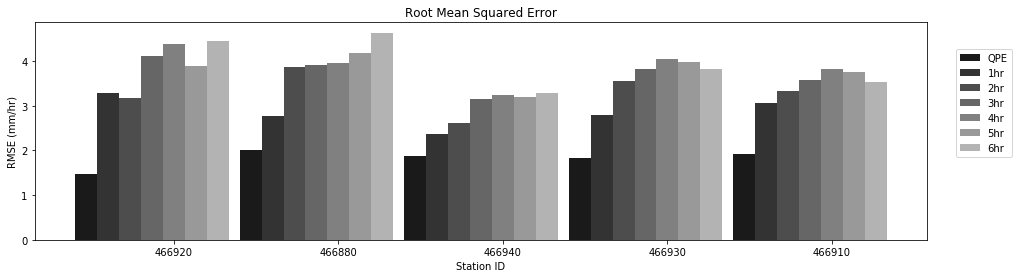

In [4]:
from matplotlib import cm

comprmse = qpf_rmse.sort_values('elevation').reset_index(drop=True)
compcorr = qpf_corr.sort_values('elevation').reset_index(drop=True)

comprmse = comprmse.loc[comprmse['id'].isin(['466880', '466910', '466920', '466930', '466940']),:]

x = np.arange(len(comprmse['id']))  # the label locations
width = 0.8  # the width of the bars
#cs =  ['blue', 'orange', 'green', 'red', 'purple', 'brown','pink','grey']
cs =  [(0.1,0.1,0.1),(0.2,0.2,0.2),(0.3,0.3,0.3),(0.4,0.4,0.4),(0.5,0.5,0.5),(0.6,0.6,0.6),(0.7,0.7,0.7)]

plt.figure(figsize=(16,4))
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE (mm/hr)')
plt.xlabel('Station ID')
plt.bar(x - width*4/6, comprmse['rmse_0hr'], width/6, color=cs[0], label='QPE')
plt.bar(x - width*3/6, comprmse['rmse_1hr'], width/6, color=cs[1], label='1hr')
plt.bar(x - width*2/6, comprmse['rmse_2hr'], width/6, color=cs[2], label='2hr')
plt.bar(x - width*1/6, comprmse['rmse_3hr'], width/6, color=cs[3], label='3hr')
plt.bar(x + width*0/6, comprmse['rmse_4hr'], width/6, color=cs[4], label='4hr')
plt.bar(x + width*1/6, comprmse['rmse_5hr'], width/6, color=cs[5], label='5hr')
plt.bar(x + width*2/6, comprmse['rmse_6hr'], width/6, color=cs[6], label='6hr')
#plt.bar(x + width*2/8, comprmse['rmse_12hr'], width/8, color=cs[6], label='12hr')
#plt.bar(x + width*3/8, comprmse['rmse_24hr'], width/8, color=cs[7], label='24hr')
plt.xticks(x, comprmse['id'], fontsize=10)
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.show()


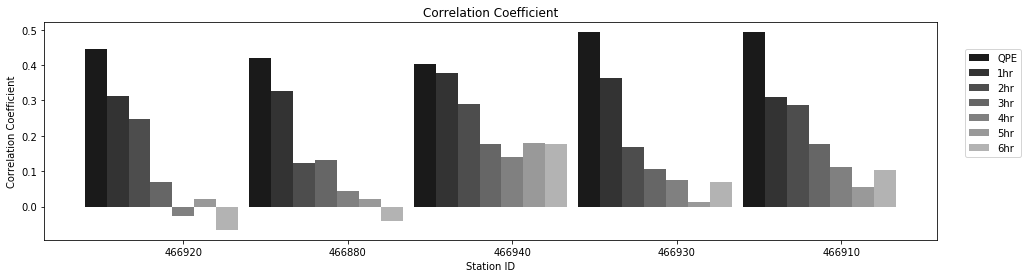

In [6]:
compcorr = compcorr.loc[compcorr['id'].isin(['466880', '466910', '466920', '466930', '466940']),:]

x = np.arange(len(comprmse['id']))  # the label locations
width = 0.8  # the width of the bars
cs =  [(0.1,0.1,0.1),(0.2,0.2,0.2),(0.3,0.3,0.3),(0.4,0.4,0.4),(0.5,0.5,0.5),(0.6,0.6,0.6),(0.7,0.7,0.7)]

plt.figure(figsize=(16,4))
plt.title('Correlation Coefficient')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Station ID')
plt.bar(x - width*4/6, compcorr['corr_0hr'], width/6, color=cs[0], label='QPE')
plt.bar(x - width*3/6, compcorr['corr_1hr'], width/6, color=cs[1], label='1hr')
plt.bar(x - width*2/6, compcorr['corr_2hr'], width/6, color=cs[2], label='2hr')
plt.bar(x - width*1/6, compcorr['corr_3hr'], width/6, color=cs[3], label='3hr')
plt.bar(x + width*0/6, compcorr['corr_4hr'], width/6, color=cs[4], label='4hr')
plt.bar(x + width*1/6, compcorr['corr_5hr'], width/6, color=cs[5], label='5hr')
plt.bar(x + width*2/6, compcorr['corr_6hr'], width/6, color=cs[6], label='6hr')
plt.xticks(x, comprmse['id'], fontsize=10)
plt.legend(bbox_to_anchor=(1.1, 0.9))
plt.show()
